<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn
!pip install git+https://github.com/rcmalli/keras-vggface.git

     |████████████████████████████████| 2.3MB 4.8MB/s 
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-_chulwfl
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-_chulwfl
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=7472d08b6c2f7b9d3539c19facc548a7212f936cc33a0bb5a2b08ac2d36449b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-r7r33_3q/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [ ]:
%tensorflow_version 1.x
# example of face detection with mtcnn
import cv2
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# create the detector, using default weights
detector = MTCNN()

def face_extract(filename, required_size=(224, 224)):
  # load image from file
  pixels = pyplot.imread(filename)  
  
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  faces = []
  for item in results:
    x1, y1, width, height = item['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    face = cv2.resize(face, required_size )
    faces.append(face)
  return faces


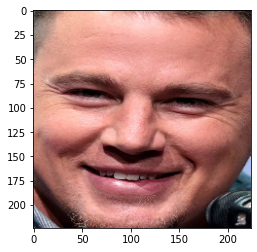

In [ ]:
# load the photo and extract the face
faces = face_extract('/content/channing_tatum.jpg')

for face in faces:
  # plot the extracted face
  pyplot.imshow(face)
  # show the plot
  pyplot.show()




In [ ]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_8:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_1/Softmax:0' shape=(?, 8631) dtype=float32>]


In [ ]:
import numpy as np
faces = np.array(faces,dtype="float64")
faces = preprocess_input(faces,version=2)
# perform prediction
yhat = model.predict(faces)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Channing_Tatum': 93.964%
b' Eoghan_Quigg': 0.149%
b' Les_Miles': 0.127%
b' Ibrahim_Afellay': 0.087%
b' Tovah_Feldshuh': 0.085%


In [ ]:
# create a vggface2 model
model = VGGFace(model='senet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

175693824/175688524 [==============================] - 3s 0us/step
Inputs: [<tf.Tensor 'input_9:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_2/Softmax:0' shape=(?, 8631) dtype=float32>]


In [ ]:
faces = np.array(faces)
# perform prediction
yhat = model.predict(faces)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Channing_Tatum': 98.274%
b' Beau_Ryan': 0.653%
b' Mario_G\xc3\xb6tze': 0.460%
b' Malky_Mackay': 0.093%
b' Rados\xc5\x82aw_Sikorski': 0.061%
